<a href="https://colab.research.google.com/github/bsguarda/Regressao_PyCaret/blob/main/Regress%C3%A3o_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Science**
*by Bruno Guarda*   
[<img alt="Colaboratory logo" width="10%" src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white">](https://linkedin.com/in/bruno-guarda)
[<img alt="Colaboratory logo" width="10%" src="https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white">](https://medium.com/@bsguarda)
[<img alt="Colaboratory logo" width="10%" src="https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white">](
https://github.com/bsguarda)

___

# Regressão com PyCaret

<img alt="Colaboratory logo" width="80%" src="https://raw.githubusercontent.com/bsguarda/Regressao_PyCaret/main/Pycaret.jpg">

O PyCaret é um framework o conceito open-source e low code que demanda pouco código e que oferece ao Cientista de Dados a possibilidade de construir um Pipeline pronto para o Deploy, fazendo experimentos de Machine Learning de ponta a ponta de forma robusta e reduzindo o tempo entre as fases de hipóteses e insigths.

Esse framework engloba as mais diversas e mais eficientes bibliotecas de Machine Learning, como XGBoost, Scikit-learn, LigthGBM entre outras ferramentas que são de extrema importância.

Algumas características do PyCaret:

* ## Pré-processamento
  
  * *Pode ser feita a configuração de tratamento de dados nulos ou faltantes, escolher e tratar alguma variável, normalizar dados e  muito mais;*

* ## Diversos Algoritmos
    
   * *Pode ser utilizado para Regressão, Classificação, Agrupamento, PLN, Detecção de Anomalias e Associação;*

* ## Ajustes(Tunar) Parâmetros

    * *O PyCaret faz a varredura dos melhores parâmetros para os modelos, mesmo se esse não tiver uma boa performance;*   

* ## Compara os modelos
  
  * *Com apenas uma linha código é possível fazer a comparação de mais de 10 algoritmos diferentes de Machine Learning, mostrando a classificação do melhor modelo com a pontuação de cada métrica isso e de forma ultra rápida;*

* ## Plotagem de gráficos
  
  * *Ele consegue plotar diversos gráficos de forma rápida tanto para DataViz como para interpretação dos modelos;*

* ## Combina vários algoritmos

  * *Com os métodos de Ensemble e Blend consegue fazer a combinação dos algoritmos;*

* ## Modelo em Produção

  * *Com o modelo finalizado, o mesmo pode ser salvo e ser colocado em produção, usando o Flask ou Streamilit ou usa o seu deploy como script em serviço de Cloud(AWS, Google Cloud ou Azure).*

## Instalação do PyCaret

Como está sendo usando o Colab, será instalndo o PyCaret já que esse Framework não faz parte das bibliotecas nativas.

In [ ]:
#instalando o Pycaret
!pip install pycaret -q

Para ser usado esse Framework no Colab precisa ser ativado o modo colab.

In [ ]:
# ativando o modo Colab
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


### Importando os dados

O Pycaret dispõe de uma variedade de data sets e que podem ser carregados usando a função `get_data` da propria biblioteca.

Para conferir a lista completa dos -> [Data sets](https://pycaret.org/get-data/)

Será feito um projeto de regressão e para isso será utilizado o conjunto de dados `house`, que traz os dados sobre preço de venda dos imoveis.

In [ ]:
# importando os dados
from pycaret.datasets import get_data
data = get_data('house')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# verificando o tamanho do data set

print(f'O data set tem: {data.shape[0]} linhas')
print(f'O data set tem: {data.shape[1]} colunas')

O data set tem: 1460 linhas
O data set tem: 81 colunas


### Separando os dados 

Já será feito a divisão de dados em treino e teste, somente utilizando os dados de treino durante a construção do modelo e usaremos os dados de teste no final do projeto.

In [ ]:
# separando os dados

test = data.sample(frac=0.2)
train = data.drop(test.index)

test.reset_index(inplace=True)
train.reset_index(inplace=True)

In [ ]:
# verificando os dados após a divisão
print(f'Os dados de treino ficaram com: {train.shape[0]} linhas e {train.shape[1]} colunas')
print(f'Os dados de teste ficaram com: {test.shape[0]} linhas e {test.shape[1]} colunas')

Os dados de treino ficaram com: 1168 linhas e 82 colunas
Os dados de teste ficaram com: 292 linhas e 82 colunas


### Importando a biblioteca de Regressão do PyCaret

In [ ]:
# importando o pacote de regressão

from pycaret.regression import *

### Criação do modelo

Será feito a criação do modelo `regressor` que irá chamar regressão

In [ ]:
# criando o Setup

regressao = setup(data=train, target='SalePrice')

,Description,Value
0,session_id,5102
1,Target,SalePrice
2,Original Data,"(1168, 82)"
3,Missing Values,True
4,Numeric Features,20
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(817, 388)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='SalePrice',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [ ]:
# criando o Pipeline

regressao = setup(data=data,
                  target='SalePrice',
                  normalize=True,
                  log_experiment=True,
                  experiment_name='sales_target')

,Description,Value
0,session_id,6574
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 402)"


INFO:logs:Logging experiment in MLFlow
2023/01/05 12:08:30 INFO mlflow.tracking.fluent: Experiment with name 'sales_target' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=['Id'],
                                      ml_usecase='regression',
                                      numerical_features=[], target='SalePrice',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                           

## Comparação entre os Modelos

Com o intuito de avaliar qual o modelo tem a melhor performance e saber qual o modelo especifico será usado no projeto. Porém pode ser feito diretamente com um modelo especifico caso já se saiba qual o modelo utilizar.

A função `compare_model` avalia os modelos usando a validação cruzada e imprime uma tabela que mostra a média do MAE, MSE, RMSE, R2, RMSLE e MAPE através dos folds (10 por padrão) de todos os modelos disponíveis na biblioteca.

* MAE (Mean Absolute Error) -  Mostra a média de erro em valores absolutos.
* MSE (Mean Squared Error) - Erro Quadrático Médio
* RMSE (Root Mean Squared Error) - Raiz do Erro Quadrático Médio
* R2 (Coefficient of Determination) - R2 Score
* RMSLE (Root Mean Squared Log Error) - Raiz do Erro Logaritmo Quadrático Médio
* MAPE (Mean Absolute Percentage Error) - Mostra a média do erro absoluto em valores percentuais.

In [ ]:
# comparando os modelos

melhor_modelo = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.649569e+04,7.779997e+08,2.696653e+04,8.862000e-01,0.1403,0.0985,0.984
lightgbm,Light Gradient Boosting Machine,1.762925e+04,8.376140e+08,2.843322e+04,8.758000e-01,0.1478,0.1044,0.305
rf,Random Forest Regressor,1.834196e+04,8.338831e+08,2.858420e+04,8.743000e-01,0.1536,0.1106,2.269
huber,Huber Regressor,1.570647e+04,9.963185e+08,2.835297e+04,8.574000e-01,0.1374,0.0941,0.408
par,Passive Aggressive Regressor,1.610967e+04,1.010868e+09,2.919138e+04,8.558000e-01,0.1356,0.0951,0.900
et,Extra Trees Regressor,2.149346e+04,1.147281e+09,3.352434e+04,8.285000e-01,0.1778,0.1275,3.301
omp,Orthogonal Matching Pursuit,1.800958e+04,1.186561e+09,3.076537e+04,8.280000e-01,0.1503,0.1080,0.035
br,Bayesian Ridge,1.812182e+04,1.289898e+09,3.235868e+04,8.158000e-01,0.1549,0.1082,0.334
en,Elastic Net,2.009792e+04,1.405800e+09,3.516285e+04,7.992000e-01,0.1587,0.1170,0.036
ridge,Ridge Regression,1.893483e+04,1.403804e+09,3.371979e+04,7.972000e-01,0.1769,0.1142,0.033


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6574, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


Podemos ver que foi feito a criação de 17 modelos e já os avaliando usando o método de validação cruzada e também avaliando os modelos com base nas 6 métricas de avaliação mais utilizadas (MAE, MSE, RMSE, R2, RMSLE e MAPE). 

Essa tabela que mostra a validação cruzada já enfatiza os melhores modelos e seus respectivos resultados nas médias métricas de avaliação por comparação. O padrão desse grid é ser organizado a partir do R2 (Mais alto até o mais baixo), porém passando o parâmetro sort essa organização pode ser mudada.

In [ ]:
# Vericando o melhor modelo

print(melhor_modelo)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6574, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [33]:
# verificando os modelos

models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## Instanciando o modelo

O `compare_model` mesmo sendo uma ferramenta poderosa e ele se torna um ponto de partida para o projeto com o PyCaret pois ele não treina os modelos. O fluxo de trabalho recomendado pelos desenvolvedores do Pycaret é usar o compare_models logo após o setup para avaliar os modelos que performam melhor com o conjunto de dados e selecionar alguns candidatos para seguir experimentando.

A função create_model() permite que você crie modelos e essa função cria e avalia o modelo usando uma stratified cross validation. Exatamente como o compare_models, o `creat_model` gera tabela de pontuação que mostra MAE, MSE, RMSE, R2, RMSLE e MAPE por fold.

Será utilizado nesse projeto o **GBR (Gradient Boosting Regressor)**.

## Gradient Boosting Regressor


<p align="center"><img src="https://raw.githubusercontent.com/bsguarda/Regressao_PyCaret/main/GBR.webp"width="60%"></p>

No quesito de construção de modelos preditivos o Gradient Boosting é uma das técnicas mais poderosas.

Vamos falar superficialmente desse modelo que trabalha basicamente em cima de 3 elementos:

* Uma loss function para ser otimizada
* Um "Weak Learner" para fazer previsões
* Um modelo aditivo para adicionar aos Weak Learners para minimizar a loss function.

Basicamente o que esse modelo faz é aprender com erros e ir melhorando a cada passagem.texto em itálico

In [17]:
# instaciando o modelo GBR
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15240.0492,5.349708e+08,23129.4368,0.9320,0.1279,0.0897
1,13274.0650,3.787953e+08,19462.6647,0.9318,0.1024,0.0746
2,16708.2368,5.834404e+08,24154.5106,0.8992,0.1318,0.0968
3,19358.7372,1.155041e+09,33985.8901,0.8735,0.1392,0.0951
4,17386.3817,7.779677e+08,27892.0725,0.8871,0.1485,0.1022
5,15601.0505,4.786316e+08,21877.6503,0.9136,0.1293,0.0948
6,15080.9819,5.472008e+08,23392.3246,0.9056,0.1452,0.1015
7,15986.3848,4.784916e+08,21874.4510,0.8926,0.1792,0.1220
8,18023.7271,8.620760e+08,29361.1309,0.8993,0.1329,0.0992


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 3
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6574, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


Podemos avaliar que a média dessa tabela é mesma que foi vista na tabela gerada pelo `compare_models`

In [18]:
# verificando os parâmetros do GBR

print(gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6574, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


## Tuning do modelo

O modelo criado usando o create_model() usa hiperparâmetros padrão para cada modelo. Para fazer o ajustes (tuning) nesses parâmetros, usa-se a função tune_model().

Essa função faz o tuning dos parâmetros automaticamente, e novamente avalia com validação cruzada, gerando uma tabela de scores para MAE, MSE, RMSE, R2, RMSLE e MAPE por fold.

OBS: A função tune_model() não recebe um objeto de modelo treinado como input. Ao invés disso, ela requer que o modelo passado seja uma string abreviada do modelo, como instanciamos anteriormente no create_model(). Todas as outras funções do pycaret.regression requerem um objeto de modelo treinado como argumento.

In [19]:
# tuning do modelo

tunning_gbr = tune_model(gbr, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14072.6555,4.433590e+08,21056.0917,0.9437,0.1102,0.0808
1,14320.0853,4.745493e+08,21784.1520,0.9146,0.1046,0.0792
2,15902.5591,5.285134e+08,22989.4194,0.9087,0.1257,0.0925
3,18719.2984,1.083258e+09,32912.8917,0.8814,0.1330,0.0901
4,16737.7906,6.631090e+08,25750.9036,0.9038,0.1371,0.0973
5,16407.0132,5.820324e+08,24125.3475,0.8949,0.1319,0.0970
6,16109.9879,6.402586e+08,25303.3324,0.8895,0.1493,0.1059
7,15743.1687,5.117180e+08,22621.1842,0.8851,0.1856,0.1212
8,17768.9309,7.442488e+08,27280.9246,0.9130,0.1229,0.0966


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 4
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=140,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6574, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


A função tune_model() faz um random grid search dos hiperparâmetros. Ela é configurada para otimizar o R2, por padrão, porem pode ser modificado utilizando o parâmetro optimize.

Utilizaremos métrica padrão nesse projeto específico, R2, por conta da simplicidade e facilidade dos fins educacionais. No mundo real, para saber qual a métrica ideal para o seu problema, é preciso ter um escopo melhor do problema, colaboração de outras pessoas envolvidas no projeto, para que seja feito de uma forma decisiva e não arbitrária.


 Essas métricas por si só não devem ser o único critério a ser avaliado ao finalizar o projeto e escolher o melhor modelo para produção. Podem ser avaliados outros fatores incluem tempo de treinamento, desvio padrão dos folds, entre outros.

Apesar de não terem sido melhores que o GBR com os parâmetros configurados no padrão, outros modelos, após o tuning, poderiam ter tido uma melhora maior, e superado o resultado obtido aqui.

In [20]:
# verificando os parâmetros do modelo ja com tunning

print(tunning_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=140,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6574, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


### Fazendo o Plot dos Modelos

Será usada a função plot_model() para plotar visualizações sobre a performance do nosso modelo, como Residual Plots, Prediction Error, Feature Importance, etc.

Essa função recebe o modelo treinado como input e retorna um plot baseado no desempenho com o pedaço do conjunto de dados separado para teste.

Existem mais de 10 plots diferentes disponíveis. Pode ser verificada na docstring da função para ver a lista de plots disponível.

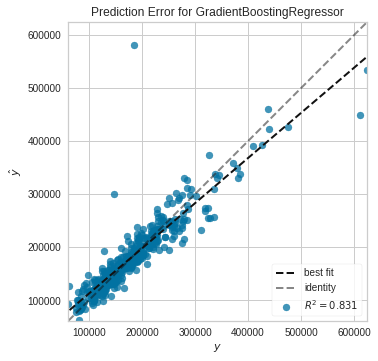

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [21]:
plot_model(tunning_gbr, plot='error')

Pode ser utilizada a plotagem para feature_importances, que é uma visualização extremamente importante, que nos mostra qual a importância de cada uma das variáveis para o resultado do modelo.

Podemos dizer que estamos medindo o poder preditivo de cada variável.

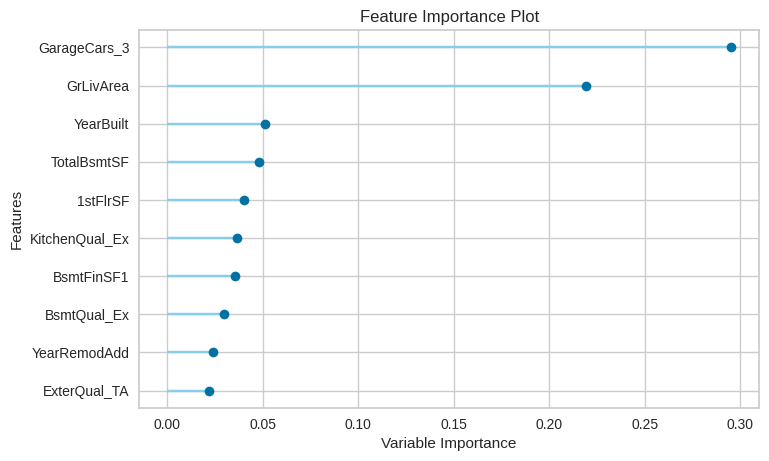

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [22]:
# plotando o feature importance

plot_model(tunning_gbr, plot='feature')

## Avaliação Interativa dos Modelos

Podemos utilizar a função evaluate_model(), que é outra forma de analisar a performance dos modelos, retorna uma interface para todos os plots disponíveis para cada modelo. Internamente, essa função usa a função que mostramos anteriormente, plot_model().

In [23]:
evaluate_model(tunning_gbr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=140,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6574, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Fazendo Previsões

Será feita uma checagem final, fazendo previsões no conjunto de teste e revisando as métricas de avaliação, é recomendável que se faça antes de finalizar o modelo.

Essa checagem tem o objetivo de verificar a diferença de performance entre os resultados da validação cruzada e dos dados novos.

In [27]:
# fazendo as previsões
predict_model(tunning_gbr);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=140,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6574, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing d

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,16264.6403,8.948935e+08,29914.7706,0.8313,0.1334,0.0939


## Finalizando o Modelo

O último passo do desse projeto é finalizar o modelo. Um fluxo de trabalho normal no PyCaret começa com o setup(), seguido do compare_models() para encontrarmos os melhores candidatos baseado nas métricas de avaliação de interesse, para então darmos seguimento com tunig de parâmetros, ensembling, stacking, etc.

Esse fluxo eventualmente irá levá-lo ao melhor modelo para fazer previsões em dados ainda não vistos. A função finalize_model() dá o fit no modelo, incluindo o conjunto de teste separado dentro do PyCaret anteriormente (20% nesse caso).

O intuito disso é treinar o modelo no dataset completo antes de ser feito o deploy para produção.

In [28]:
# finalizando o modelo

gbr_final = finalize_model(tunning_gbr)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=140,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6574, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, lea

## Prevendo em Dados Novos

Passaremos como data os dados que ainda não foram vistos pelo modelo, separados anteriormente, no começo do projeto.


In [29]:
predicao_teste = predict_model(gbr_final, data=test)
predicao_teste.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=140,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6574, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing d

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,9846.7774,1.785164e+08,13361.0015,0.9607,0.0874,0.063


,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Label
0,1131,1132,20,RL,63.0,10712,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,NaN,0,9,2007,Oth,Abnorml,93500,108686.919996
1,561,562,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2006,WD,Normal,170000,161289.414940
2,966,967,50,RL,130.0,9600,Pave,NaN,IR1,HLS,...,NaN,NaN,NaN,0,6,2009,WD,Normal,160000,151903.770380
3,697,698,20,RL,57.0,6420,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,9,2006,WD,Normal,123500,125821.024055
4,1378,1379,160,RM,21.0,1953,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,6,2006,WD,Normal,83000,95137.044414


A coluna label é adicionada ao conjunto novo. O Label é o valor previsto pelo modelo GBR.

## Salvando o Modelo

Com o modelo terminado, é hora de se preocupar em como mantê-lo utilizável e pronto para fazer novas previsões em novos dados.

Usando a função save_model() pode salvar o modelo treinado, pronto para uso. Dentro dele também está contido todo o pipeline de pré-processamento que foi utilizado. Basta passar o conjunto de dados para fazer as previsões.


In [30]:
# salvando o modelo
save_model(gbr_final, 'Gbr_Model_03_01_23')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=140,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6574, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), model_name=Gbr_Model_03_01_23, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                   

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['Id'],
                                       ml_usecase='regression',
                                       numerical_features=[], target='SalePrice',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                                            learning_rate=0.05, loss='ls',
                                            max_depth=4, max_features=1.0,
                                            max_leaf_nodes=None,
                                            min_impurity_de

## Carregando um Modelo

Será utilizado o método load_model, passando como parâmetro o nome do arquivo do modelo.

In [31]:
# carregando o modelo 

carregando_modelo = load_model('Gbr_Model_03_01_23')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Gbr_Model_03_01_23, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


## Novas previsões

Com o modelo carregado, podem ser feitas novas previsões com ele. Será utilizado os dados de testes novamente para mostrar como ser feito.

In [32]:
# novas previsões

novas_predicoes = predict_model(carregando_modelo, data=test)
novas_predicoes.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=['Id'],
                                      ml_usecase='regression',
                                      numerical_features=[], target='SalePrice',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                                           learning_rate=0.05, loss='ls',
                                           max_depth=4, max_features=1.0,
                                           max_leaf_nodes=None,
  

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,9846.7774,1.785164e+08,13361.0015,0.9607,0.0874,0.063


,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Label
0,1131,1132,20,RL,63.0,10712,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,NaN,0,9,2007,Oth,Abnorml,93500,108686.919996
1,561,562,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2006,WD,Normal,170000,161289.414940
2,966,967,50,RL,130.0,9600,Pave,NaN,IR1,HLS,...,NaN,NaN,NaN,0,6,2009,WD,Normal,160000,151903.770380
3,697,698,20,RL,57.0,6420,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,9,2006,WD,Normal,123500,125821.024055
4,1378,1379,160,RM,21.0,1953,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,6,2006,WD,Normal,83000,95137.044414


# Conclusão

Podemos ver que com esse framework podemos fazer um deploy de Machine Learning com poucas linhas de códigos e em uma velocidade absurdamente grande;

Trazer plot de gráficos extremamente precisos e interativos;

Plotar a feature_importance que traz a importância de cada variável dentro do modelo;

Podemos fazer também a comparação de vários modelos;

Pode ser feito também o ajuste fino dos parâmetros dos modelos, melhorando ainda mais eficiência;

Experimente você também essa mega ferramenta.